In [1]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras import models,layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset_path = "/content/drive/MyDrive/dataset/17Flowers/train"
dataset_path_test = "/content/drive/MyDrive/dataset/17Flowers/test"

img_dt_generator = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


dataset_train = img_dt_generator.flow_from_directory(
    dataset_path,
    subset="training",
    shuffle=True,
    target_size=(224,224),
    batch_size=16
)

dataset_validation = img_dt_generator.flow_from_directory(
    dataset_path,
    subset="validation",
    target_size=(224,224),
    shuffle=False,
)

dataset_test = img_dt_generator.flow_from_directory(
    dataset_path_test,
    target_size=(224,224)
)


print(dataset_train.class_indices)

Found 823 images belonging to 17 classes.
Found 197 images belonging to 17 classes.
Found 340 images belonging to 17 classes.
{'bluebell': 0, 'buttercup': 1, 'coltsfoot': 2, 'cowslip': 3, 'crocus': 4, 'daffodil': 5, 'daisy': 6, 'dandelion': 7, 'fritillary': 8, 'iris': 9, 'lilyvalley': 10, 'pansy': 11, 'snowdrop': 12, 'sunflower': 13, 'tigerlily': 14, 'tulip': 15, 'windflower': 16}


In [4]:
model = models.Sequential([

    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),


    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),


    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),


    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(17, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(dataset_train,
                    epochs=35,
                    validation_data=dataset_validation,
                    callbacks=[early_stop])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/35
52/52 ━━━━━━━━━━━━━━━━━━━━ 394s 7s/step - accuracy: 0.0627 - loss: 2.9105 - val_accuracy: 0.1218 - val_loss: 2.5229
Epoch 2/35
52/52 ━━━━━━━━━━━━━━━━━━━━ 66s 319ms/step - accuracy: 0.1075 - loss: 2.5751 - val_accuracy: 0.1980 - val_loss: 2.4628
Epoch 3/35
52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 320ms/step - accuracy: 0.1977 - loss: 2.4072 - val_accuracy: 0.3096 - val_loss: 2.0135
Epoch 4/35
52/52 ━━━━━━━━━━━━━━━━━━━━ 17s 324ms/step - accuracy: 0.2967 - loss: 2.1603 - val_accuracy: 0.3350 - val_loss: 1.9516
Epoch 5/35
52/52 ━━━━━━━━━━━━━━━━━━━━ 18s 335ms/step - accuracy: 0.3234 - loss: 2.0524 - val_accuracy: 0.3706 - val_loss: 1.9286
Epoch 6/35
52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 316ms/step - accuracy: 0.3755 - loss: 1.8924 - val_accuracy: 0.4061 - val_loss: 1.6598
Epoch 7/35
52/52 ━━━━━━━━━━━━━━━━━━━━ 17s 320ms/step - accuracy: 0.3853 - loss: 1.8019 - val_accuracy: 0.4416 - val_loss: 1.7319
Epoch 8/35
52/52 ━━━━━━━━━━━━━━━━━━━━ 19s 368ms/step - accuracy: 0.4220 - loss: 1.7744 - val_accura

In [6]:
model.save("model.keras")

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 17)             │         2,193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,821,877 (148.09 MB)

 Trainable params: 12,940,625 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,881,252 (98.73 MB)

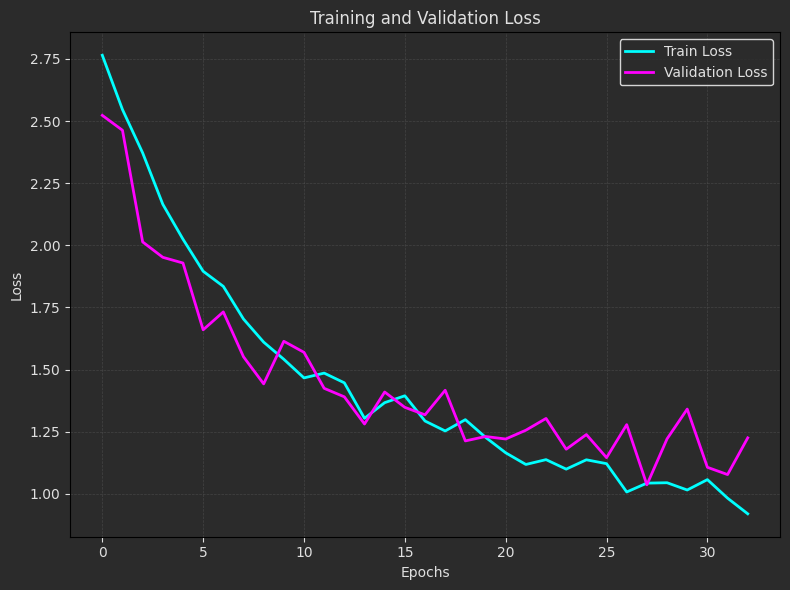

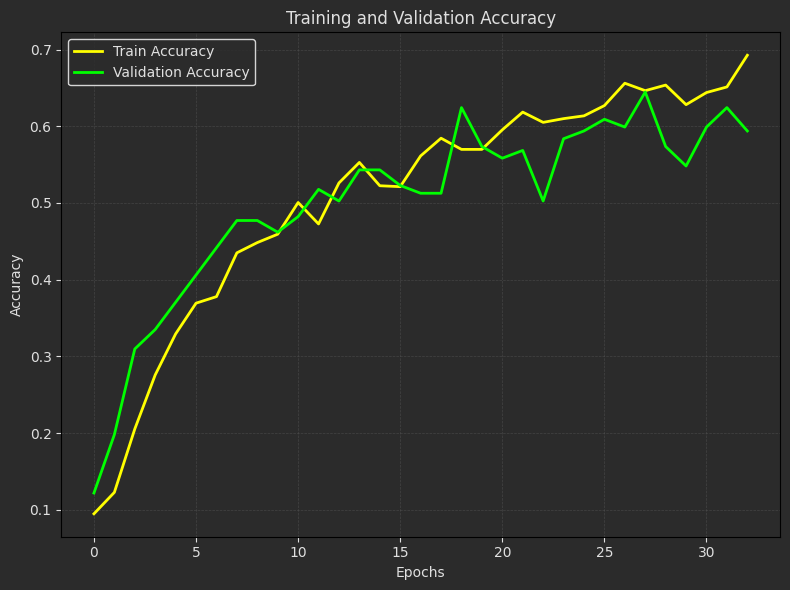

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('#2b2b2b')

ax.plot(history.history['loss'], label='Train Loss', color='cyan', linewidth=2)
ax.plot(history.history['val_loss'], label='Validation Loss', color='magenta', linewidth=2)

ax.set_title('Training and Validation Loss', color='#e0e0e0')
ax.set_xlabel('Epochs', color='#e0e0e0')
ax.set_ylabel('Loss', color='#e0e0e0')
ax.tick_params(colors='#e0e0e0')
ax.grid(color='#555555', linestyle='--', linewidth=0.5, alpha=0.6)
ax.set_facecolor('#2b2b2b')
ax.legend(facecolor='#2b2b2b', edgecolor='white', labelcolor='#e0e0e0')

plt.tight_layout()


fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('#2b2b2b')

ax.plot(history.history['accuracy'], label='Train Accuracy', color='yellow', linewidth=2)
ax.plot(history.history['val_accuracy'], label='Validation Accuracy', color='lime', linewidth=2)

ax.set_title('Training and Validation Accuracy', color='#e0e0e0')
ax.set_xlabel('Epochs', color='#e0e0e0')
ax.set_ylabel('Accuracy', color='#e0e0e0')
ax.tick_params(colors='#e0e0e0')
ax.grid(color='#555555', linestyle='--', linewidth=0.5, alpha=0.6)
ax.set_facecolor('#2b2b2b')
ax.legend(facecolor='#2b2b2b', edgecolor='white', labelcolor='#e0e0e0')

plt.tight_layout()

In [9]:

y_gt = dataset_validation.classes
y_pred = model.predict(dataset_validation)
y_pred = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(y_gt, y_pred)
conf_matrix

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 581ms/step


array([[ 9,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,
         0],
       [ 0,  0, 10,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         0],
       [ 0,  1,  0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  2,
         0],
       [ 2,  0,  0,  0,  7,  0,  0,  0,  0,  0,  1,  2,  0,  0,  0,  0,
         0],
       [ 0,  2,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  3,
         0],
       [ 0,  0,  0,  0,  1,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         2],
       [ 0,  4,  3,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  1,  0,  0,
         0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  1,
         0],
       [ 0,  0,  1,  1,  1,  0,  0,  0,  0,  7,  0,  1,  0,  0,  0,  0,
         1],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  6,  0,  2,  0,  0,  0,
         1],
       [ 1,  0,  1,  0,  2,  2,  0,  0,  0,  0,  0,  6,  0,  0,  

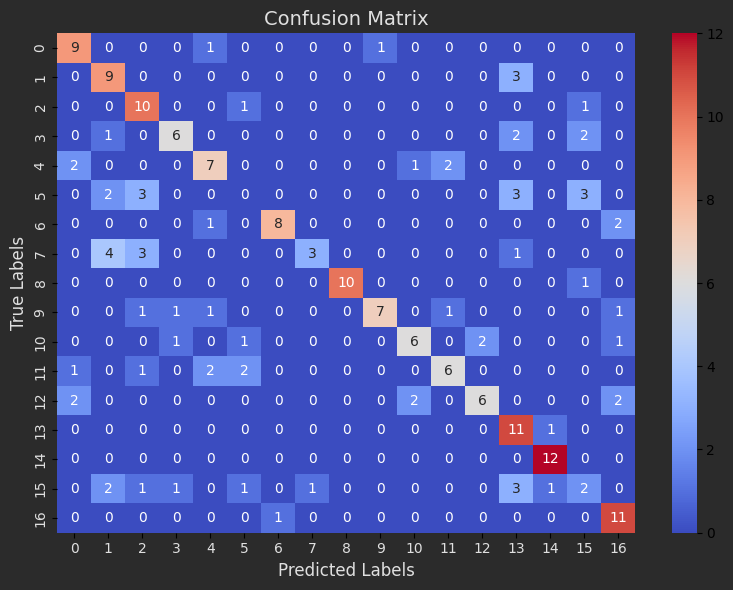

In [10]:
import seaborn as sns

plt.figure(figsize=(8, 6))
fig = plt.gcf()
fig.patch.set_facecolor('#2b2b2b')

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", cbar=True)
plt.title("Confusion Matrix", fontsize=14, color='#e0e0e0')
plt.xlabel("Predicted Labels", fontsize=12, color='#e0e0e0')
plt.ylabel("True Labels", fontsize=12, color='#e0e0e0')
plt.xticks(color='#e0e0e0')
plt.yticks(color='#e0e0e0')

plt.tight_layout()
plt.show()


In [11]:
test_loss, test_accuracy = model.evaluate(dataset_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 109s 10s/step - accuracy: 0.6556 - loss: 1.1880
Test Loss: 1.2212399244308472, Test Accuracy: 0.6264705657958984


In [12]:

image_test_1 = cv2.imread("/content/image_0203.jpg",1)
image_test_1 = cv2.resize(image_test_1,(224,224))
image_test_1 = image_test_1 / 255.0

test_1 = model.predict(np.array([image_test_1]))
predicted_class = np.argmax(test_1)


if predicted_class == 0:
    print("Bluebell")
elif predicted_class == 1:
    print("Buttercup")
elif predicted_class == 2:
    print("Coltsfoot")
elif predicted_class == 3:
    print("Cowslip")
elif predicted_class == 4:
    print("Crocus")
elif predicted_class == 5:
    print("Daffodil")
elif predicted_class == 6:
    print("Daisy")
elif predicted_class == 7:
    print("Dandelion")
elif predicted_class == 8:
    print("Fritillary")
elif predicted_class == 9:
    print("Iris")
elif predicted_class == 10:
    print("Lilyvalley")
elif predicted_class == 11:
    print("Pansy")
elif predicted_class == 12:
    print("Snowdrop")
elif predicted_class == 13:
    print("sunflower")
elif predicted_class == 14:
    print("Tigerlily")
elif predicted_class == 15:
    print("Tulip")
elif predicted_class == 16:
    print("windflower")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 810ms/step
Snowdrop
